In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# from mylib import *
import os

plt.rcParams["font.family"] = "SimSun"
plt.rcParams["axes.unicode_minus"] = False

os.environ["MYLIB_DATASETS_DIR"] = "../dataset/data"
IMG_DIR = Path("../output/imgs")
if not IMG_DIR.exists():
    IMG_DIR.mkdir()
plot_kw = dict(figsize=(30, 4), show=True, save=False, img_dir=IMG_DIR / "base")

1
2


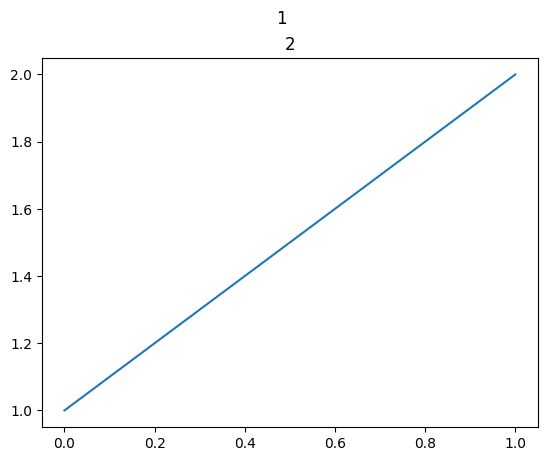

In [21]:
import matplotlib.pyplot as plt

plt.plot([1, 2])
plt.suptitle("1")
plt.title("2")
print(plt.gcf().get_suptitle())
print(plt.gca().get_title())

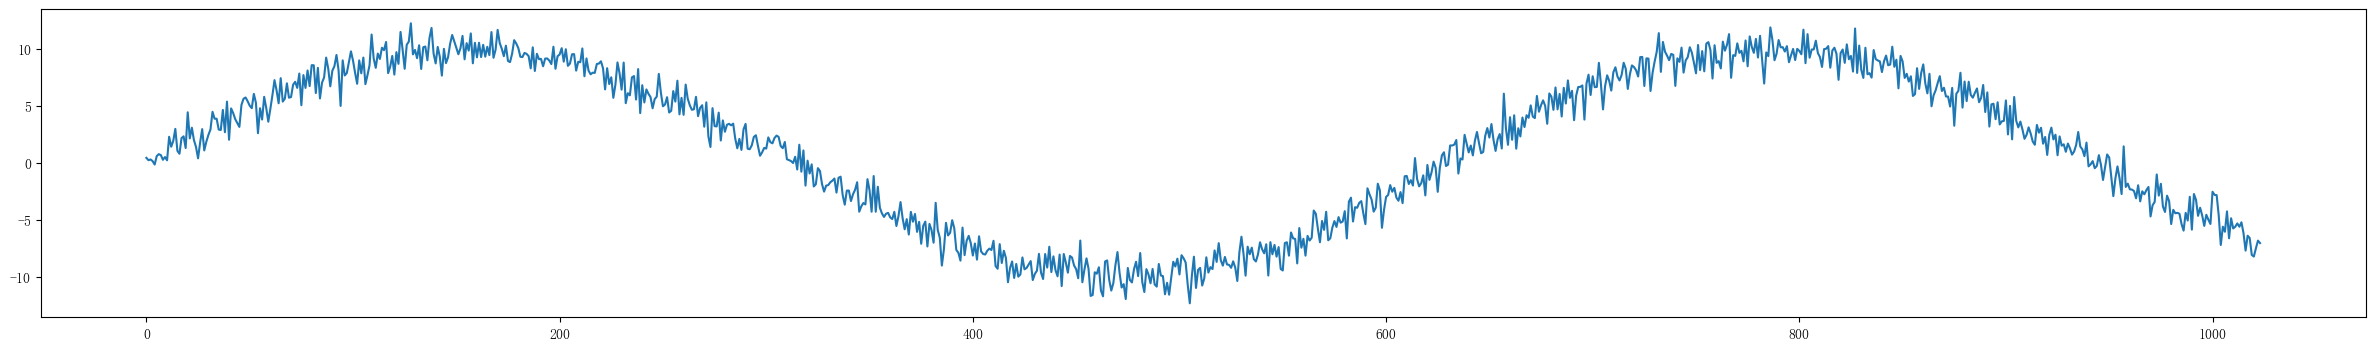

In [28]:
# 小波变换
import pywt
from mylib.plot import *

N = 1024
dt = 0.01
A = 10
t = np.linspace(0, N * dt, N)
data = np.random.randn(N) + np.sin(t) * A

plot_hook(lambda: plt.plot(data), **plot_kw)

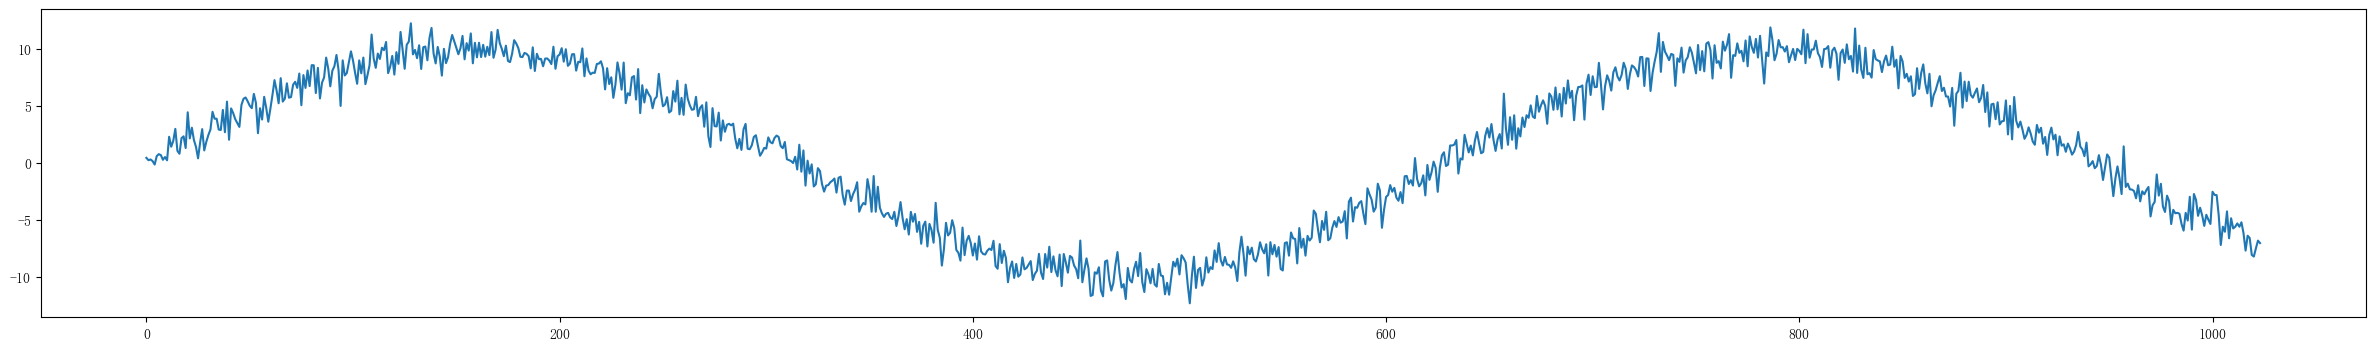

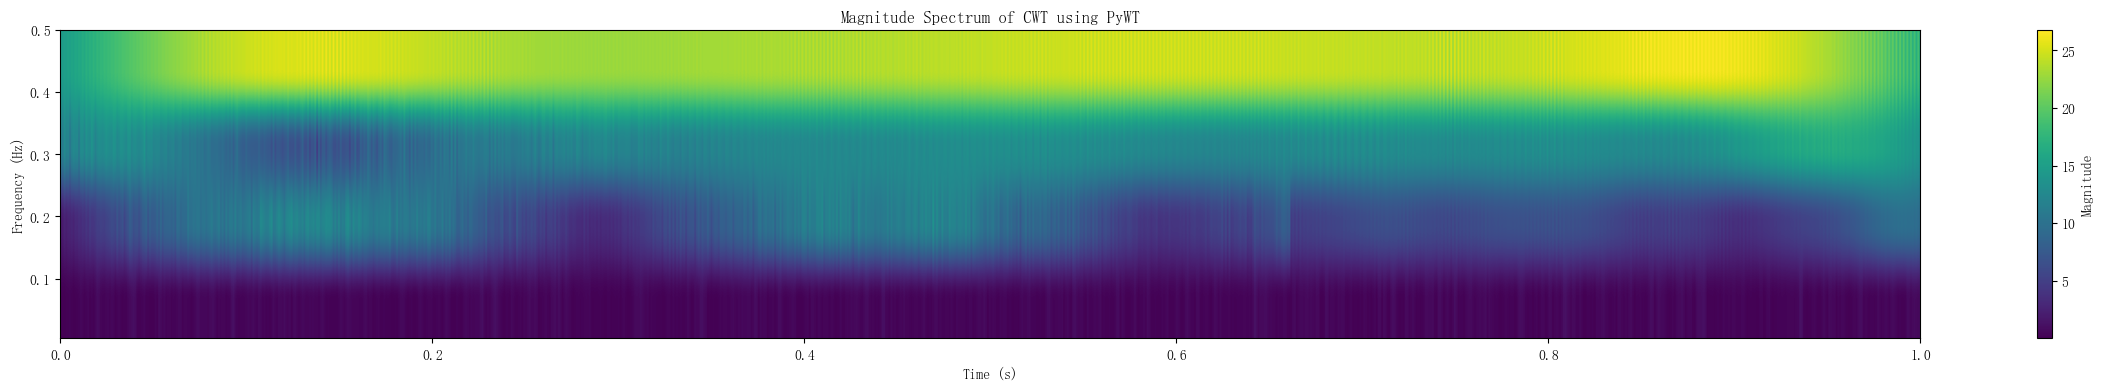

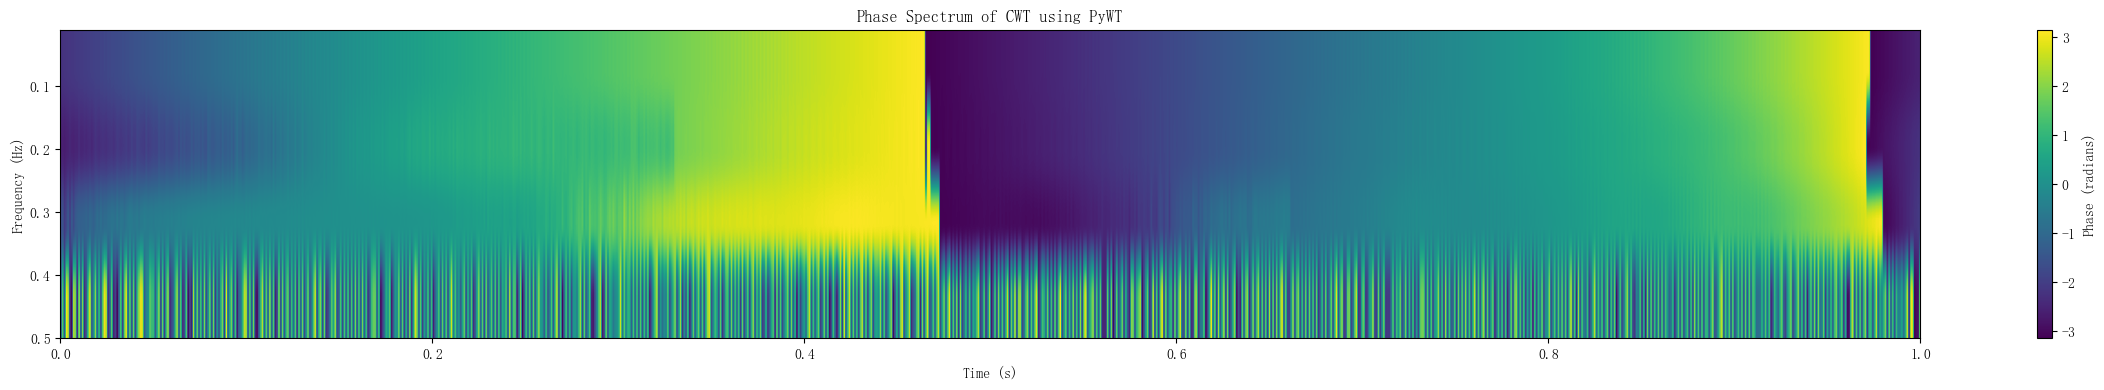

In [31]:
## 连续小波变换
wavelet = "cmor1.0-0.5"
scales = np.linspace(1, 128, 4)
cwt_result, freq = pywt.cwt(data, scales=scales, wavelet=wavelet)


@plotter(**plot_kw)
def plot_magnitude_spectrum(cwt_result, freq):
    plt.imshow(
        np.abs(cwt_result),
        aspect="auto",
        origin="lower",
        extent=[0, 1, freq[-1], freq[0]],
    )
    plt.colorbar(label="Magnitude")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Magnitude Spectrum of CWT using PyWT")


@plotter(**plot_kw)
def plot_phase_spectrum(cwt_result, freq):
    phase = np.angle(cwt_result)
    plt.imshow(phase, aspect="auto", origin="lower", extent=[0, 1, freq[0], freq[1]])
    plt.colorbar(label="Phase (radians)")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Phase Spectrum of CWT using PyWT")


plot_hook(
    lambda: plt.plot(data),
    **plot_kw,
)
plot_magnitude_spectrum(cwt_result, freq)
plot_phase_spectrum(cwt_result, freq)